<a href="https://colab.research.google.com/github/bsssgrace/Data-Science-bootcamp-projects/blob/main/HW_Essential_Python_ML_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Diabetes Dataset**

**Context**: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**Data Source**: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [1]:
!mkdir data

### Read Data

In [237]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# read data
df = pd.read_csv("data/diabetes.csv")

### Preview & Check Data

In [192]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [193]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [194]:
# check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [195]:
# check data
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Clean Data

In [196]:
# clean data in column names
cols = df.columns
new_cols = [col.lower() for col in cols]
df.columns = new_cols
list(df.columns)

['pregnancies',
 'glucose',
 'bloodpressure',
 'skinthickness',
 'insulin',
 'bmi',
 'diabetespedigreefunction',
 'age',
 'outcome']

### Check correlation

In [197]:
df.corr()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetespedigreefunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Split Data

In [198]:
# prepare data
X = df.drop(['outcome'],axis=1)
y = df['outcome']

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state = 5555)

In [199]:
# (row, column)
print(X_train.shape,
y_train.shape,
X_test.shape,
y_test.shape)

(576, 8) (576,) (192, 8) (192,)


### Predict New Data (Scoring)

1) Linear Regression Model

In [200]:
# train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# test model
lr_p = lr_model.predict(X_test) 
lr_model.score(X_test, y_test)

0.3346601708449841

In [201]:
# lr_model.intercept_
# lr_model.coef_

2) Logistic Regression Model

In [238]:
# train model
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

# test model
lg_p = lg_model.predict(X_test) 
lg_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.796875

In [217]:
print(lg_p)

[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1]


3) Random Forest model

In [203]:
# train model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# test model
rf_p = rf_model.predict(X_test) 
rf_model.score(X_test, y_test)

0.34441594185342217

4) Decision Tree Model

In [204]:
# train model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# test model
dt_p = dt_model.predict(X_test) 
dt_model.score(X_test, y_test)

0.6770833333333334

### Final Model fitting to data = Logistic Regression

In [225]:
cf_matrix = confusion_matrix(y_test, lg_p)
print(cf_matrix)

[[114  13]
 [ 26  39]]


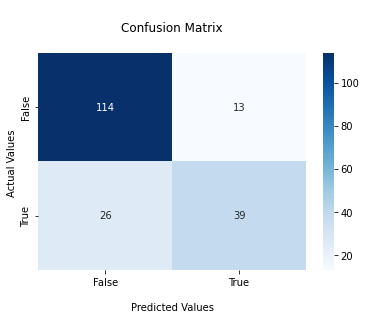

In [252]:
# source1:https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# source2:https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

import seaborn as sns

disp = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')

disp.set_title('\nConfusion Matrix\n');
disp.set_xlabel('\nPredicted Values')
disp.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
disp.xaxis.set_ticklabels(['False','True'])
disp.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [205]:
# 0=non-diabetes, 1=diabetes
print(classification_report(y_test, lg_p, target_names=['non-diabetes','diabetes']))

              precision    recall  f1-score   support

non-diabetes       0.81      0.90      0.85       127
    diabetes       0.75      0.60      0.67        65

    accuracy                           0.80       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.79      0.80      0.79       192

